In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install quandl

In [ ]:
import quandl
data=quandl.get("NSE/TATAGLOBAL")

In [ ]:
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


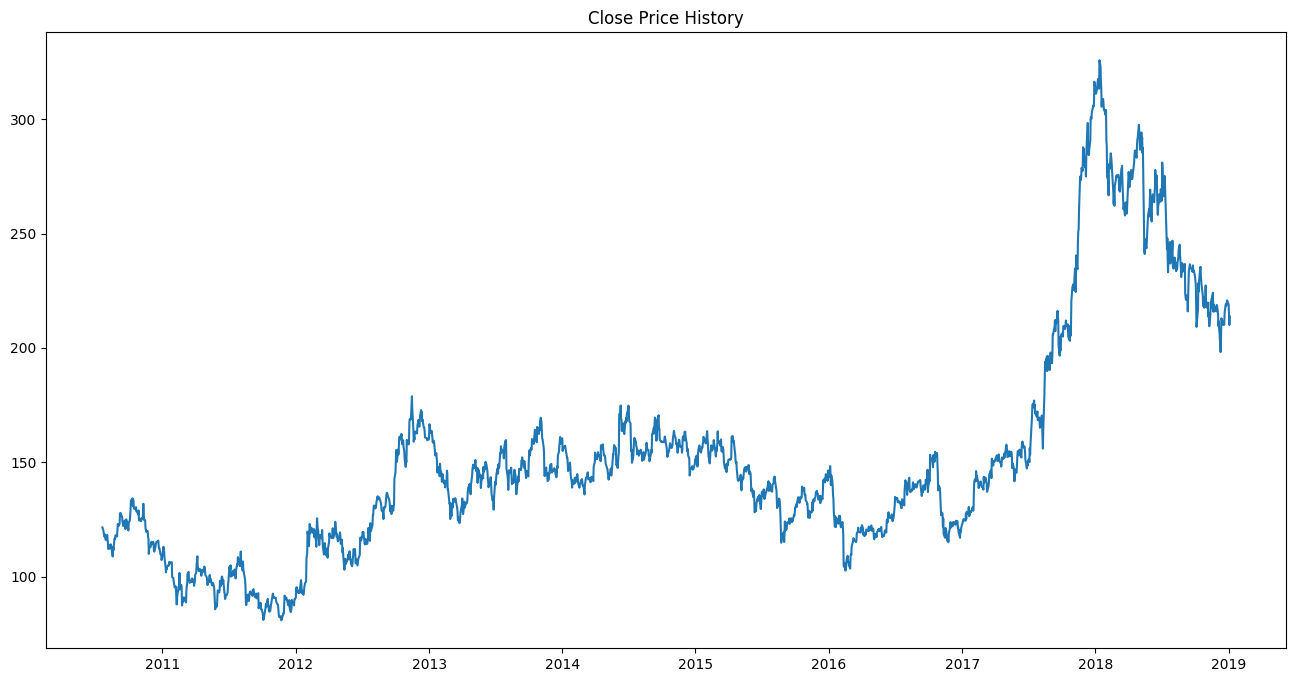

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'], label='Closing Price')
plt.show()

In [ ]:
data['Open - Close'] =  data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

In [ ]:
x=data[['Open - Close','High - Low']]
x.head()

,Open - Close,High - Low
Date,,
2010-07-21,0.55,1.95
2010-07-22,-0.60,1.75
2010-07-23,1.15,1.70
2010-07-26,2.50,3.90
2010-07-27,-1.05,7.50


In [ ]:
Y=np.where(data['Close'].shift(-1)>data['Close'],1,-1)
Y

array([-1, -1, -1, ..., -1,  1, -1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import accuracy_score


In [ ]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

In [ ]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
accuracy_train=accuracy_score(y_train,model.predict(x_train))
accuracy_test=accuracy_score(y_test,model.predict(x_test))

In [ ]:
print(accuracy_train,accuracy_test)

0.768452380952381 0.46904761904761905


In [ ]:
predictions_classification=model.predict(x_test)
predictions_classification

array([-1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,
       -1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,
        1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1,
        1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1,
       -1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,
        1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1,
       -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
        1, -1,  1,  1,  1

In [ ]:
actual_prediction=y_test
actual_prediction

array([-1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,
        1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1,  1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,
        1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,
        1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
        1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,
        1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1,
        1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
        1, -1, -1, -1,  1

In [ ]:
actual_predicted_data=pd.DataFrame({'Actual':actual_prediction,'Predicted':predictions_classification})
actual_predicted_data

,Actual,Predicted
0,-1,-1
1,-1,1
2,1,-1
3,1,1
4,-1,1
...,...,...
415,1,-1
416,-1,-1
417,1,-1
418,1,1


In [ ]:
y=data['Close']
y

,Close
Date,
2010-07-21,121.55
2010-07-22,120.90
2010-07-23,120.65
2010-07-26,117.60
2010-07-27,118.65
...,...
2018-12-31,219.40
2019-01-01,219.10
2019-01-02,214.60


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import accuracy_score

In [ ]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

In [ ]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
predictions=model.predict(x_test)
predictions

array([-0.11111111,  0.55555556, -0.55555556,  0.11111111,  0.77777778,
       -0.55555556,  0.55555556,  0.11111111,  0.55555556, -0.33333333,
        0.11111111,  0.11111111, -0.33333333,  0.11111111,  0.33333333,
       -0.55555556, -0.11111111, -0.55555556, -0.33333333,  0.11111111,
       -0.33333333,  0.11111111, -0.11111111,  0.11111111,  0.55555556,
       -0.11111111,  0.33333333, -0.33333333,  0.55555556, -0.11111111,
        0.11111111,  0.33333333, -0.11111111, -0.33333333,  0.11111111,
        0.55555556,  0.55555556, -0.11111111,  0.11111111, -0.11111111,
       -0.33333333,  0.11111111,  0.33333333, -0.11111111,  0.11111111,
       -0.55555556, -0.11111111,  0.33333333, -0.11111111,  0.33333333,
        0.33333333, -0.55555556, -0.55555556,  0.33333333, -0.11111111,
        0.11111111, -0.33333333,  0.11111111,  0.11111111, -0.11111111,
       -0.11111111, -0.33333333, -0.33333333,  0.11111111, -0.33333333,
        0.11111111,  0.33333333, -0.55555556,  0.11111111, -0.11

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rms

1.0698695300304042

In [ ]:
valid=pd.DataFrame({'Actual':y_test,'Predicted':predictions})
valid.head()

,Actual,Predicted
0,-1,-0.111111
1,-1,0.555556
2,1,-0.555556
3,1,0.111111
4,-1,0.777778


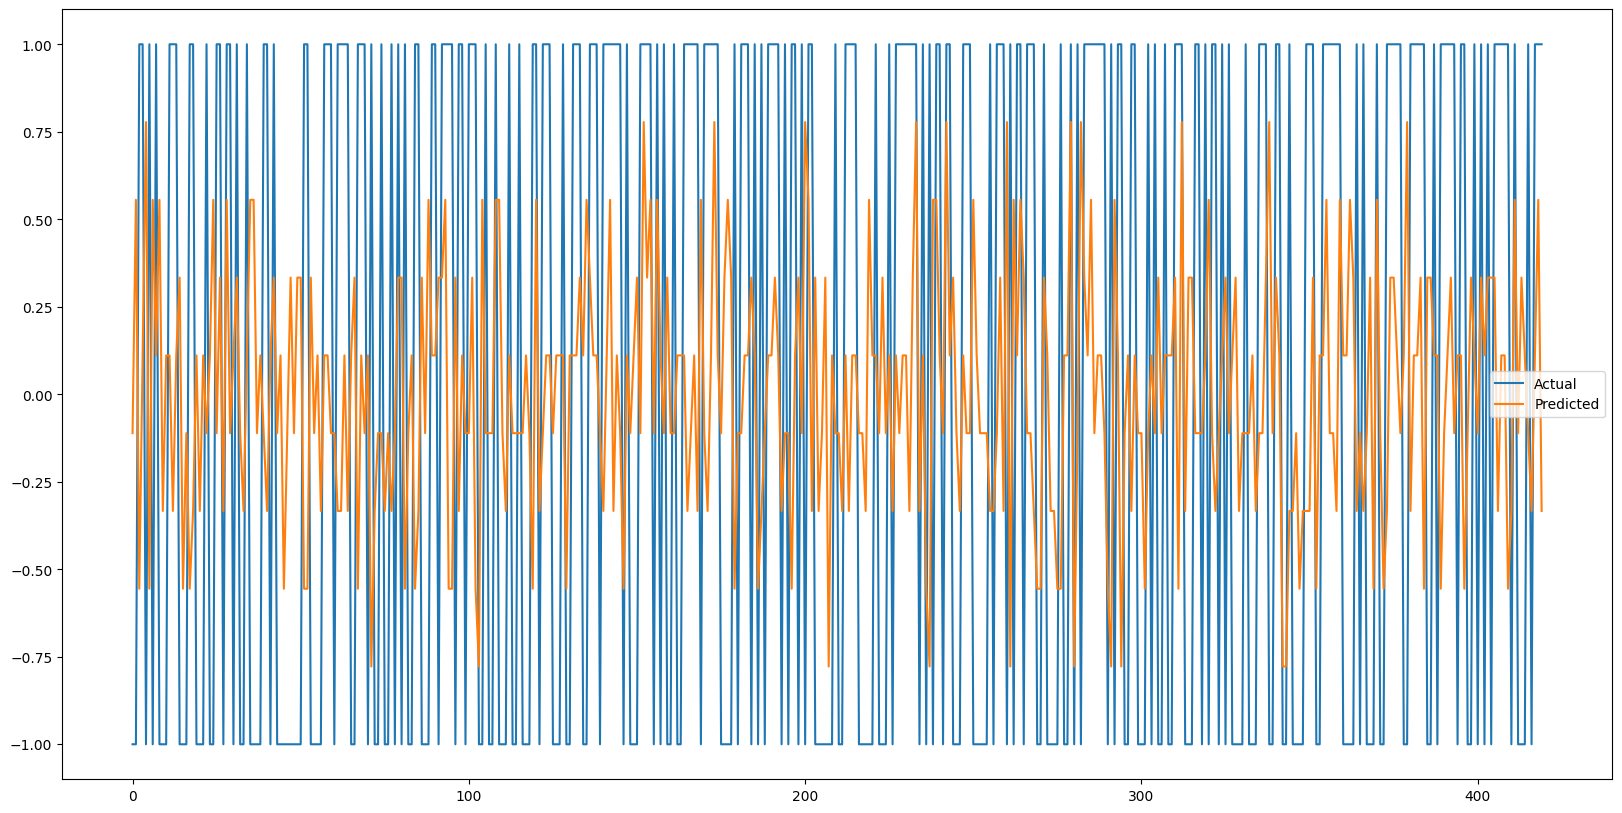

In [ ]:
import matplotlib.pyplot as plt

plot = valid.plot()
fig = plot.get_figure()
fig.set_figwidth(20)
fig.set_figheight(10)
plt.show()

#EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install quandl

In [4]:
import quandl
data = quandl.get("NSE/TATAGLOBAL")

In [5]:
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666.0,803.56
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312.0,355.17
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312.0,340.31
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440.0,780.01
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100.0,694.98


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2100 entries, 2010-07-21 to 2019-01-04
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2100 non-null   float64
 1   High                  2100 non-null   float64
 2   Low                   2100 non-null   float64
 3   Last                  2100 non-null   float64
 4   Close                 2100 non-null   float64
 5   Total Trade Quantity  2100 non-null   float64
 6   Turnover (Lacs)       2100 non-null   float64
dtypes: float64(7)
memory usage: 131.2 KB


In [7]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2.100000e+03,2100.000000
mean,151.818810,154.145190,149.361619,151.584762,151.561595,2.327641e+06,3919.237300
std,49.350352,50.127368,48.597083,49.420366,49.401844,2.081348e+06,4547.900775
min,81.100000,82.800000,80.000000,81.000000,80.950000,3.961000e+04,37.040000
25%,120.750000,122.675000,119.000000,120.600000,120.550000,1.147086e+06,1462.815000
50%,142.250000,144.300000,140.425000,142.000000,141.950000,1.768579e+06,2552.165000
75%,159.000000,161.500000,156.825000,158.712500,158.762500,2.795726e+06,4548.082500
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [8]:
data.isnull().sum()

,0
Open,0
High,0
Low,0
Last,0
Close,0
Total Trade Quantity,0
Turnover (Lacs),0


<Axes: >

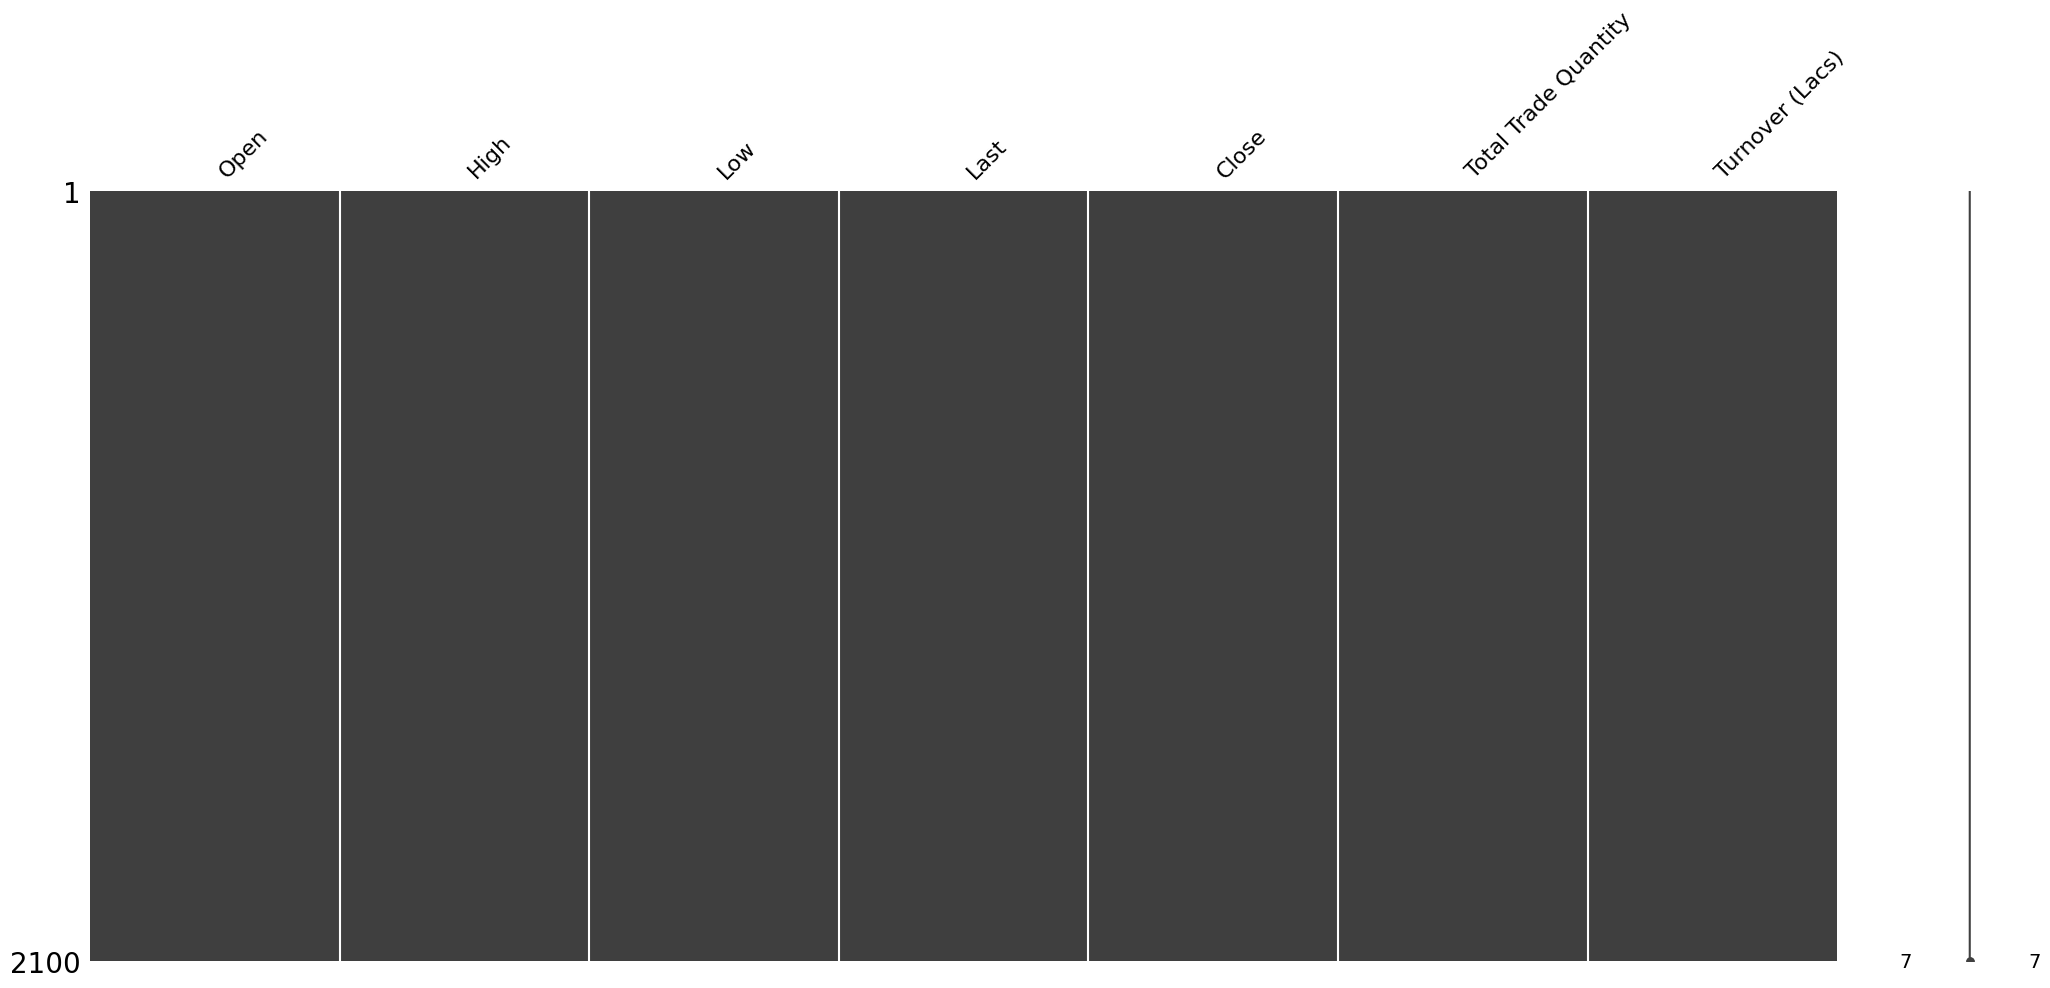

In [9]:
import missingno as msno
msno.matrix(data)

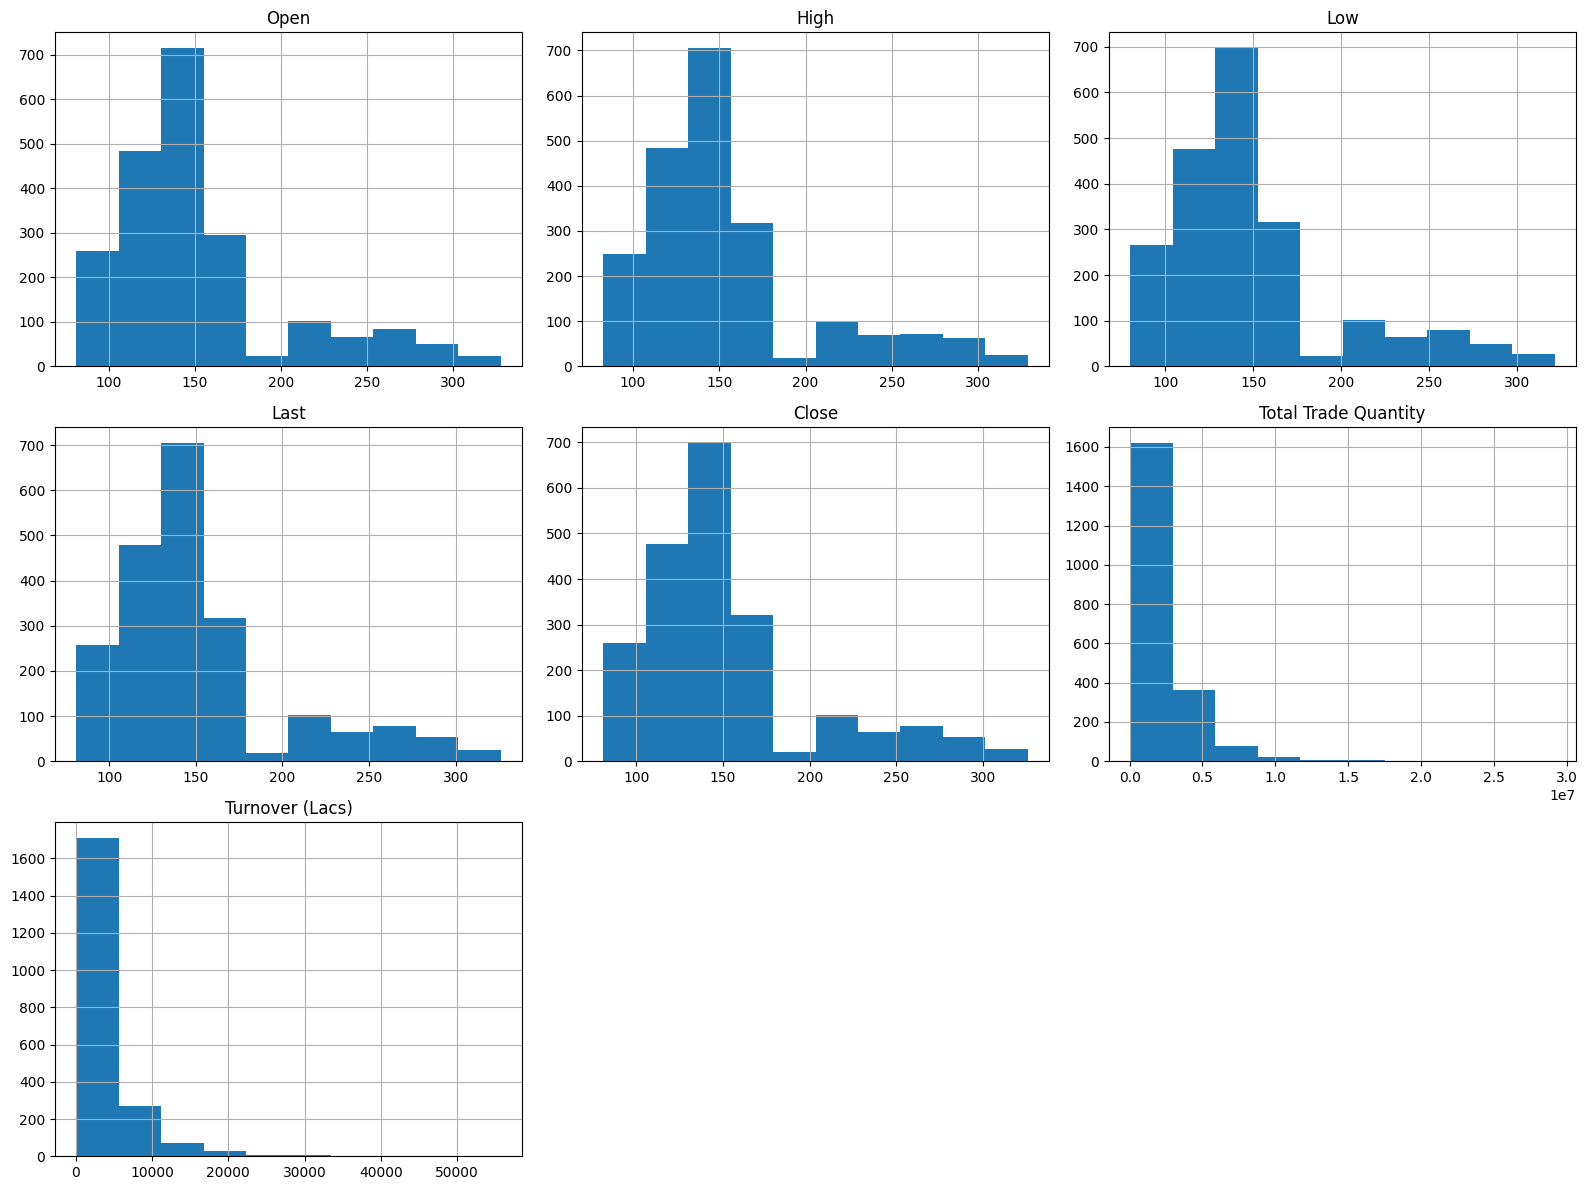

In [10]:
# Plot histograms for all numeric columns
data.hist(figsize=(16, 12))
plt.tight_layout()
plt.show()

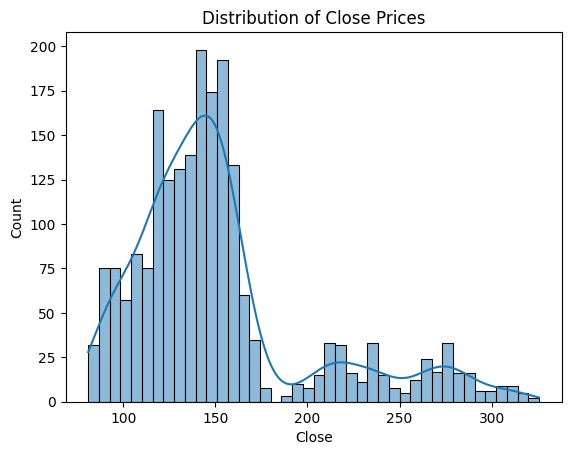

In [12]:
# Plot distribution of individual columns
sns.histplot(data['Close'], kde=True)
plt.title('Distribution of Close Prices')
plt.show()


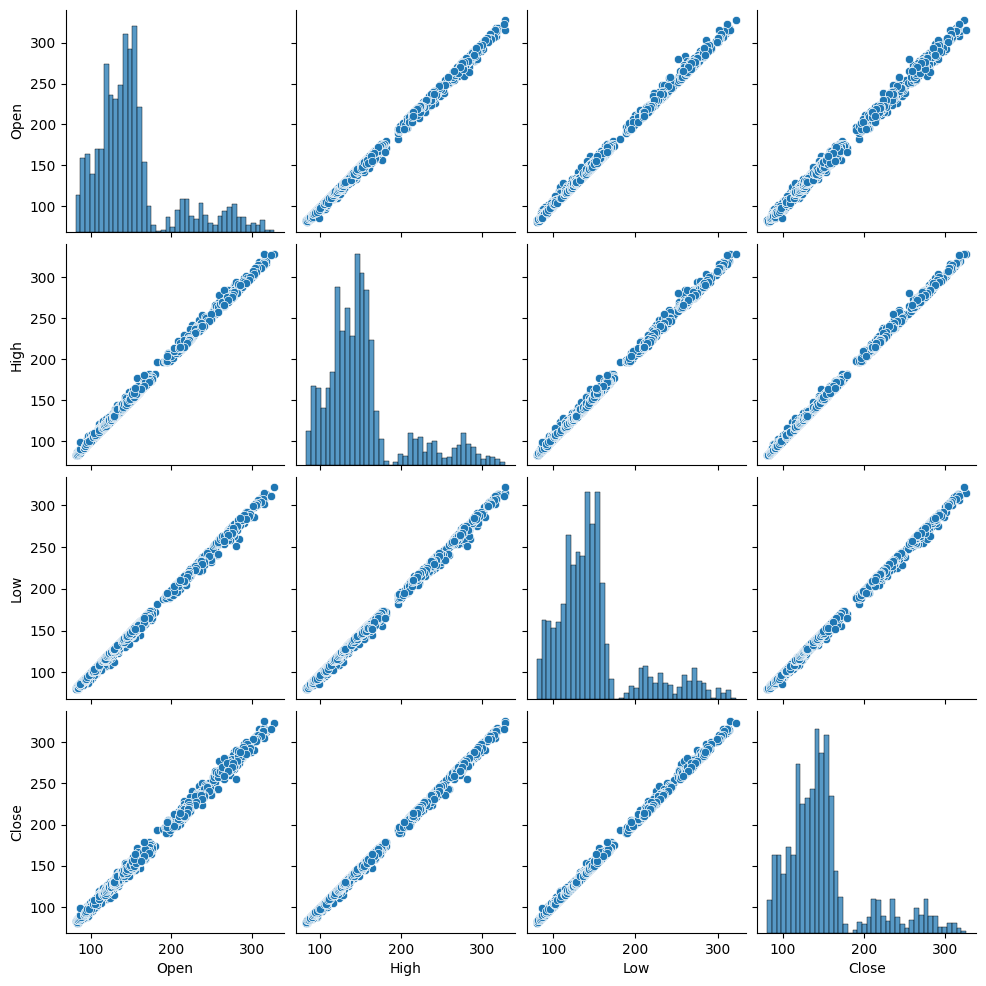

In [14]:
# Pairplot to visualize relationships between features
sns.pairplot(data[['Open', 'High', 'Low', 'Close',]])
plt.show()

In [15]:
# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

                          Open      High       Low      Last     Close  \
Open                  1.000000  0.998996  0.998829  0.997776  0.997841   
High                  0.998996  1.000000  0.998774  0.999154  0.999197   
Low                   0.998829  0.998774  1.000000  0.999038  0.999106   
Last                  0.997776  0.999154  0.999038  1.000000  0.999960   
Close                 0.997841  0.999197  0.999106  0.999960  1.000000   
Total Trade Quantity  0.365334  0.385175  0.359832  0.378315  0.377886   
Turnover (Lacs)       0.594218  0.611422  0.589656  0.605601  0.605215   

                      Total Trade Quantity  Turnover (Lacs)  
Open                              0.365334         0.594218  
High                              0.385175         0.611422  
Low                               0.359832         0.589656  
Last                              0.378315         0.605601  
Close                             0.377886         0.605215  
Total Trade Quantity              1

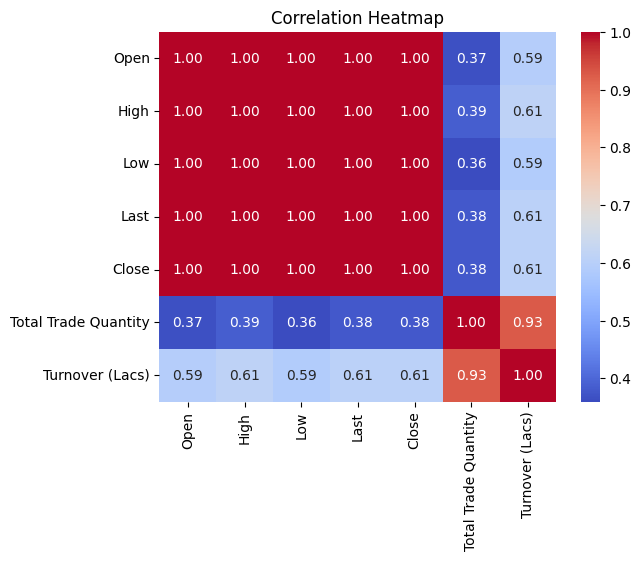

In [16]:
# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

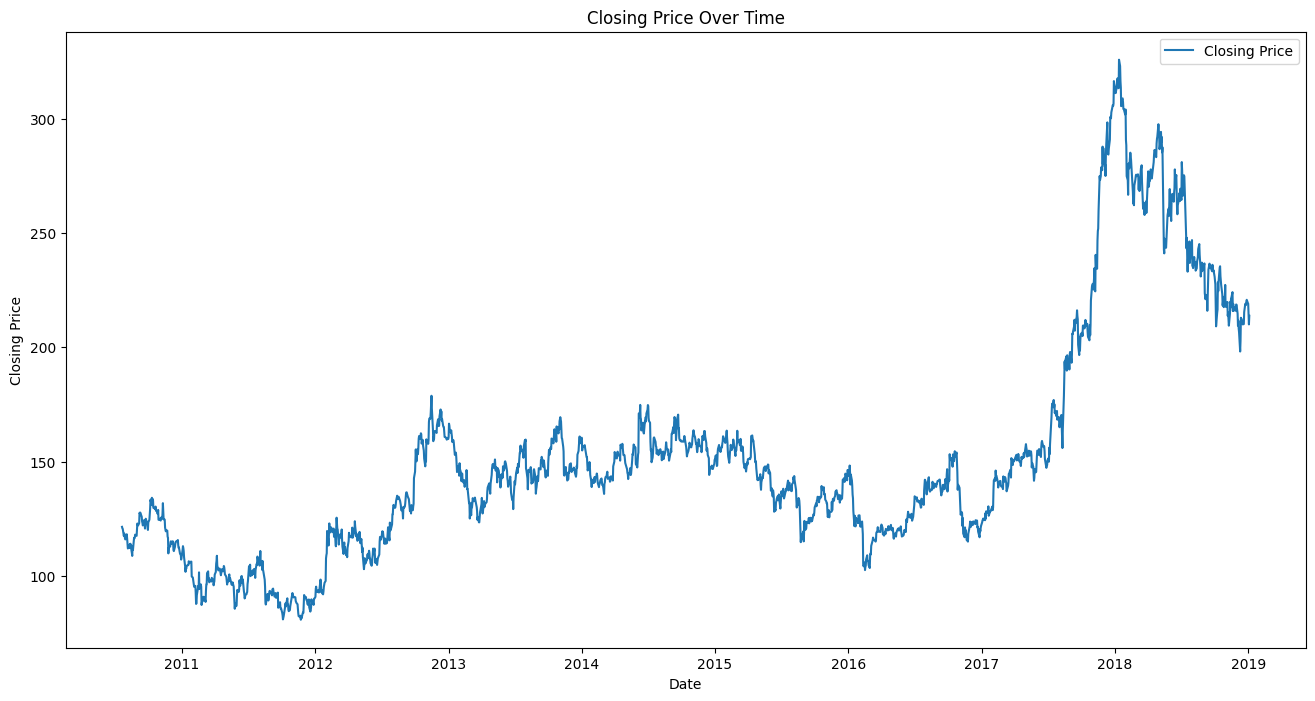

In [17]:
# Plot the time series data for 'Close' price
plt.figure(figsize=(16, 8))
plt.plot(data.index, data['Close'], label='Closing Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

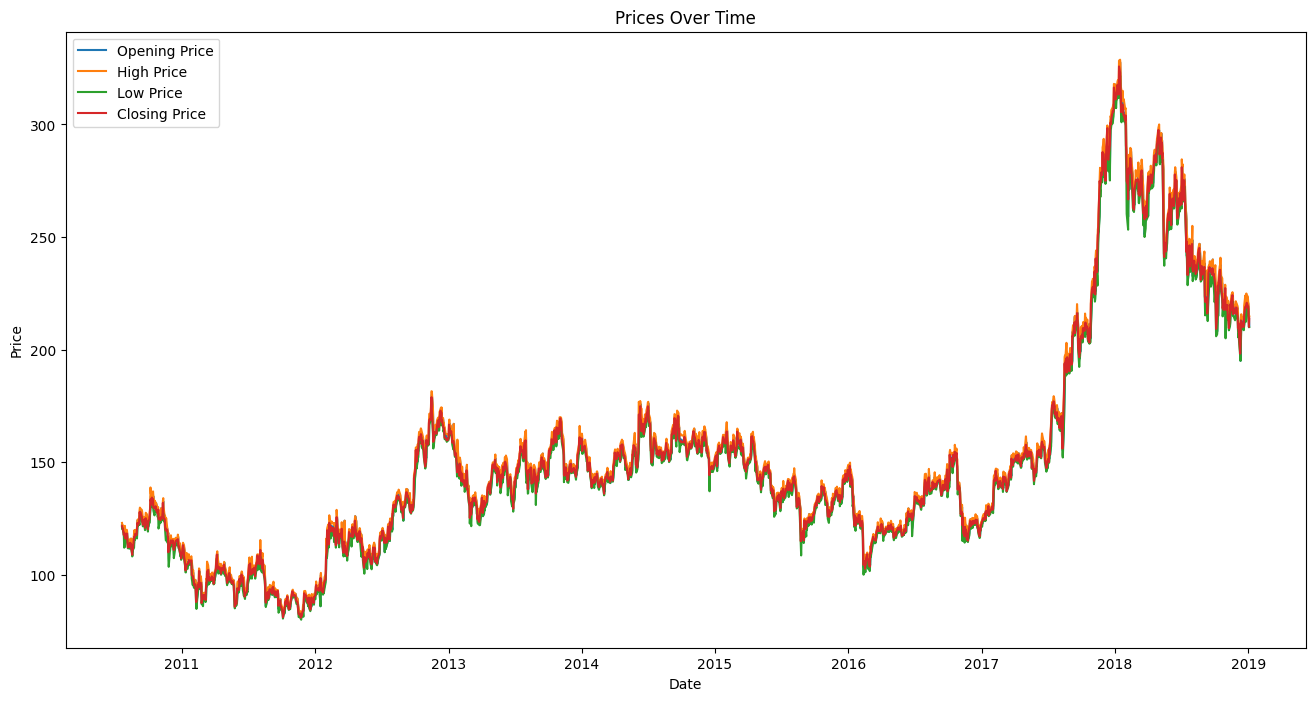

In [18]:
# Plot the time series data for 'Open', 'High', 'Low'
plt.figure(figsize=(16, 8))
plt.plot(data.index, data['Open'], label='Opening Price')
plt.plot(data.index, data['High'], label='High Price')
plt.plot(data.index, data['Low'], label='Low Price')
plt.plot(data.index, data['Close'], label='Closing Price')
plt.title('Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

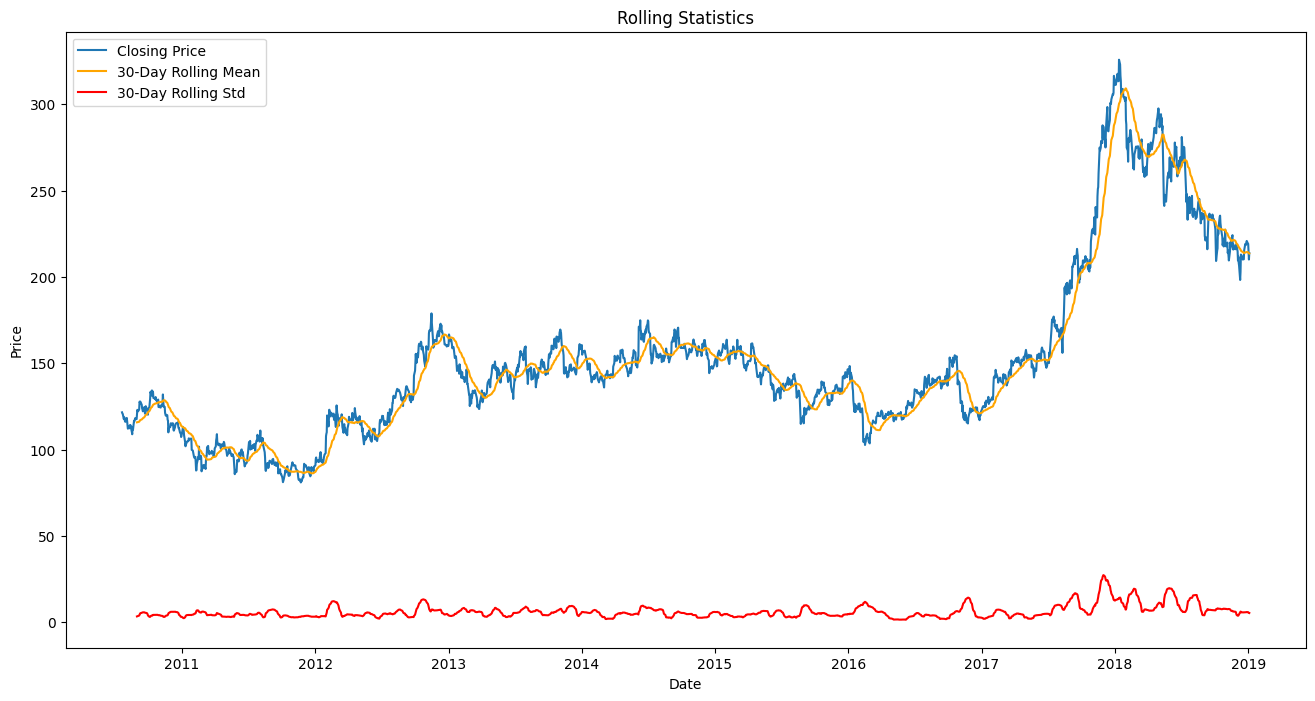

In [19]:
# Plot rolling mean and rolling standard deviation
rolling_mean = data['Close'].rolling(window=30).mean()
rolling_std = data['Close'].rolling(window=30).std()

plt.figure(figsize=(16, 8))
plt.plot(data['Close'], label='Closing Price')
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.plot(rolling_std, label='30-Day Rolling Std', color='red')
plt.title('Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


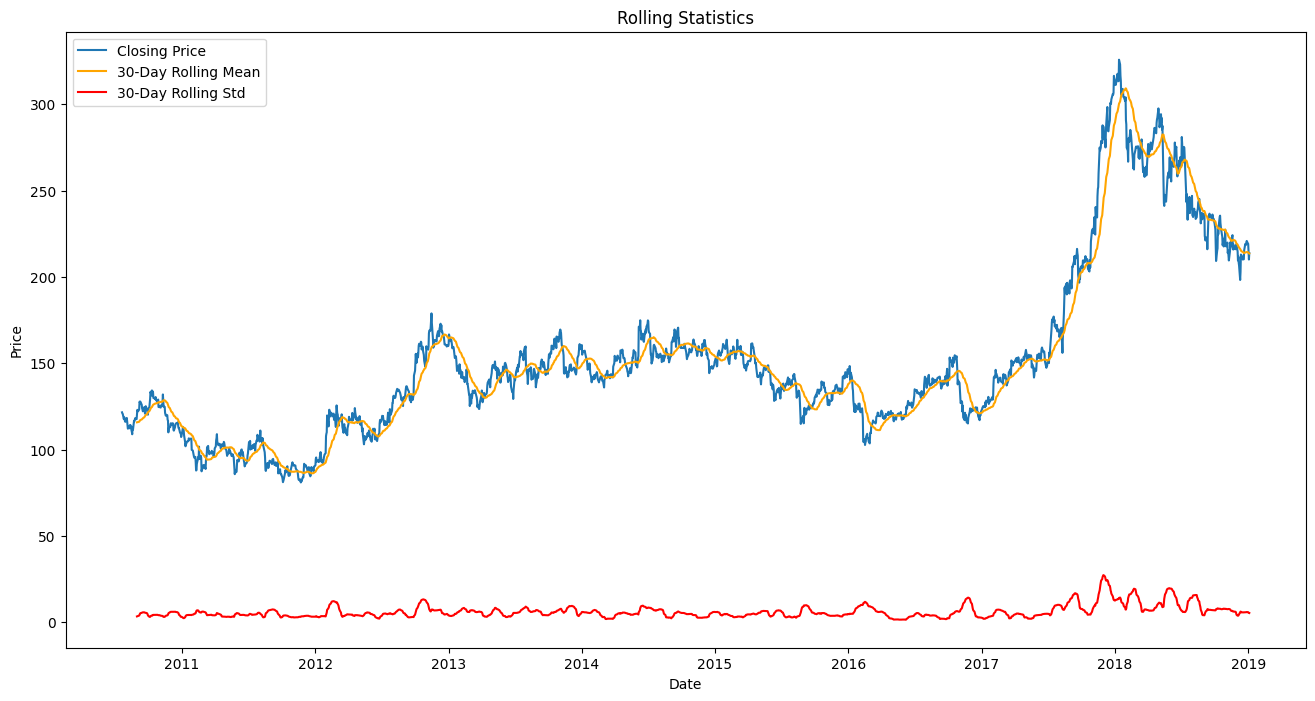

In [20]:
# Plot rolling mean and rolling standard deviation
rolling_mean = data['Close'].rolling(window=30).mean()
rolling_std = data['Close'].rolling(window=30).std()

plt.figure(figsize=(16, 8))
plt.plot(data['Close'], label='Closing Price')
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.plot(rolling_std, label='30-Day Rolling Std', color='red')
plt.title('Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


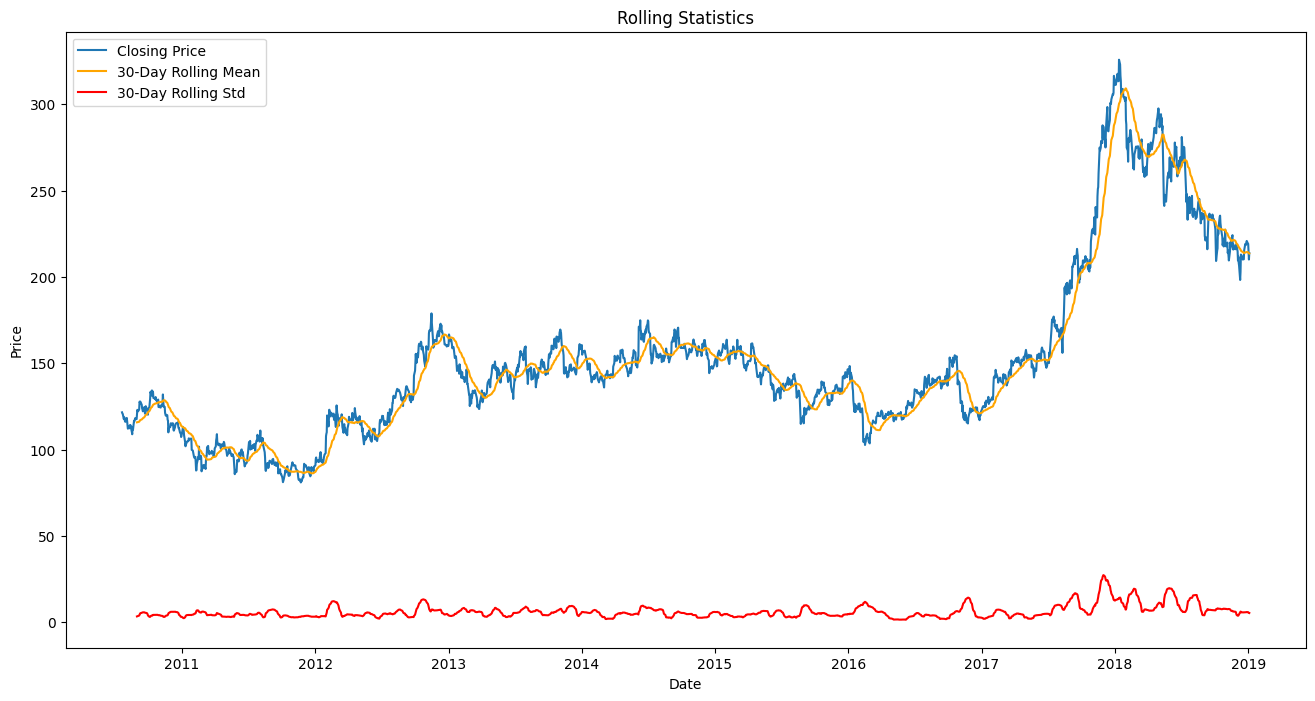

In [21]:
# Plot rolling mean and rolling standard deviation
rolling_mean = data['Close'].rolling(window=30).mean()
rolling_std = data['Close'].rolling(window=30).std()

plt.figure(figsize=(16, 8))
plt.plot(data['Close'], label='Closing Price')
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.plot(rolling_std, label='30-Day Rolling Std', color='red')
plt.title('Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [22]:
#Visualizing newly created features
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']


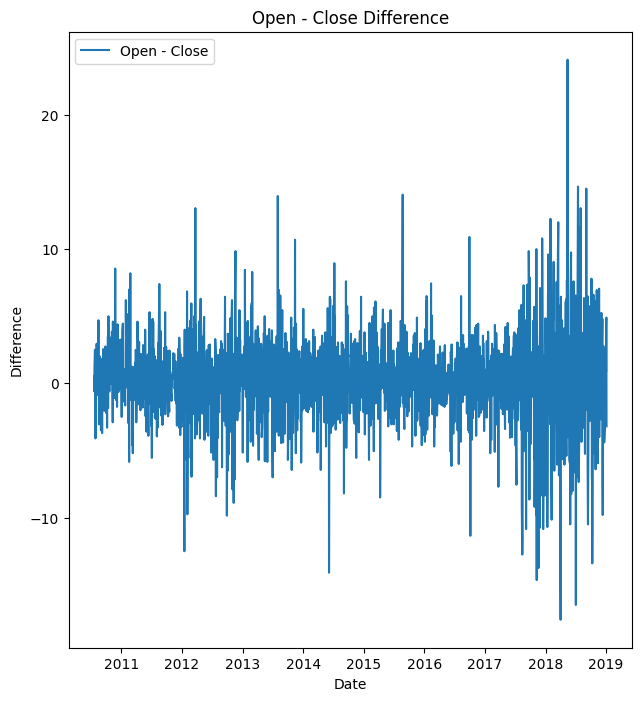

In [23]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(data.index, data['Open - Close'], label='Open - Close')
plt.title('Open - Close Difference')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()


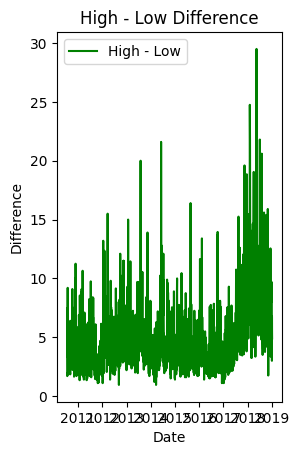

In [24]:
plt.subplot(1, 2, 2)
plt.plot(data.index, data['High - Low'], label='High - Low', color='green')
plt.title('High - Low Difference')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()

In [25]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

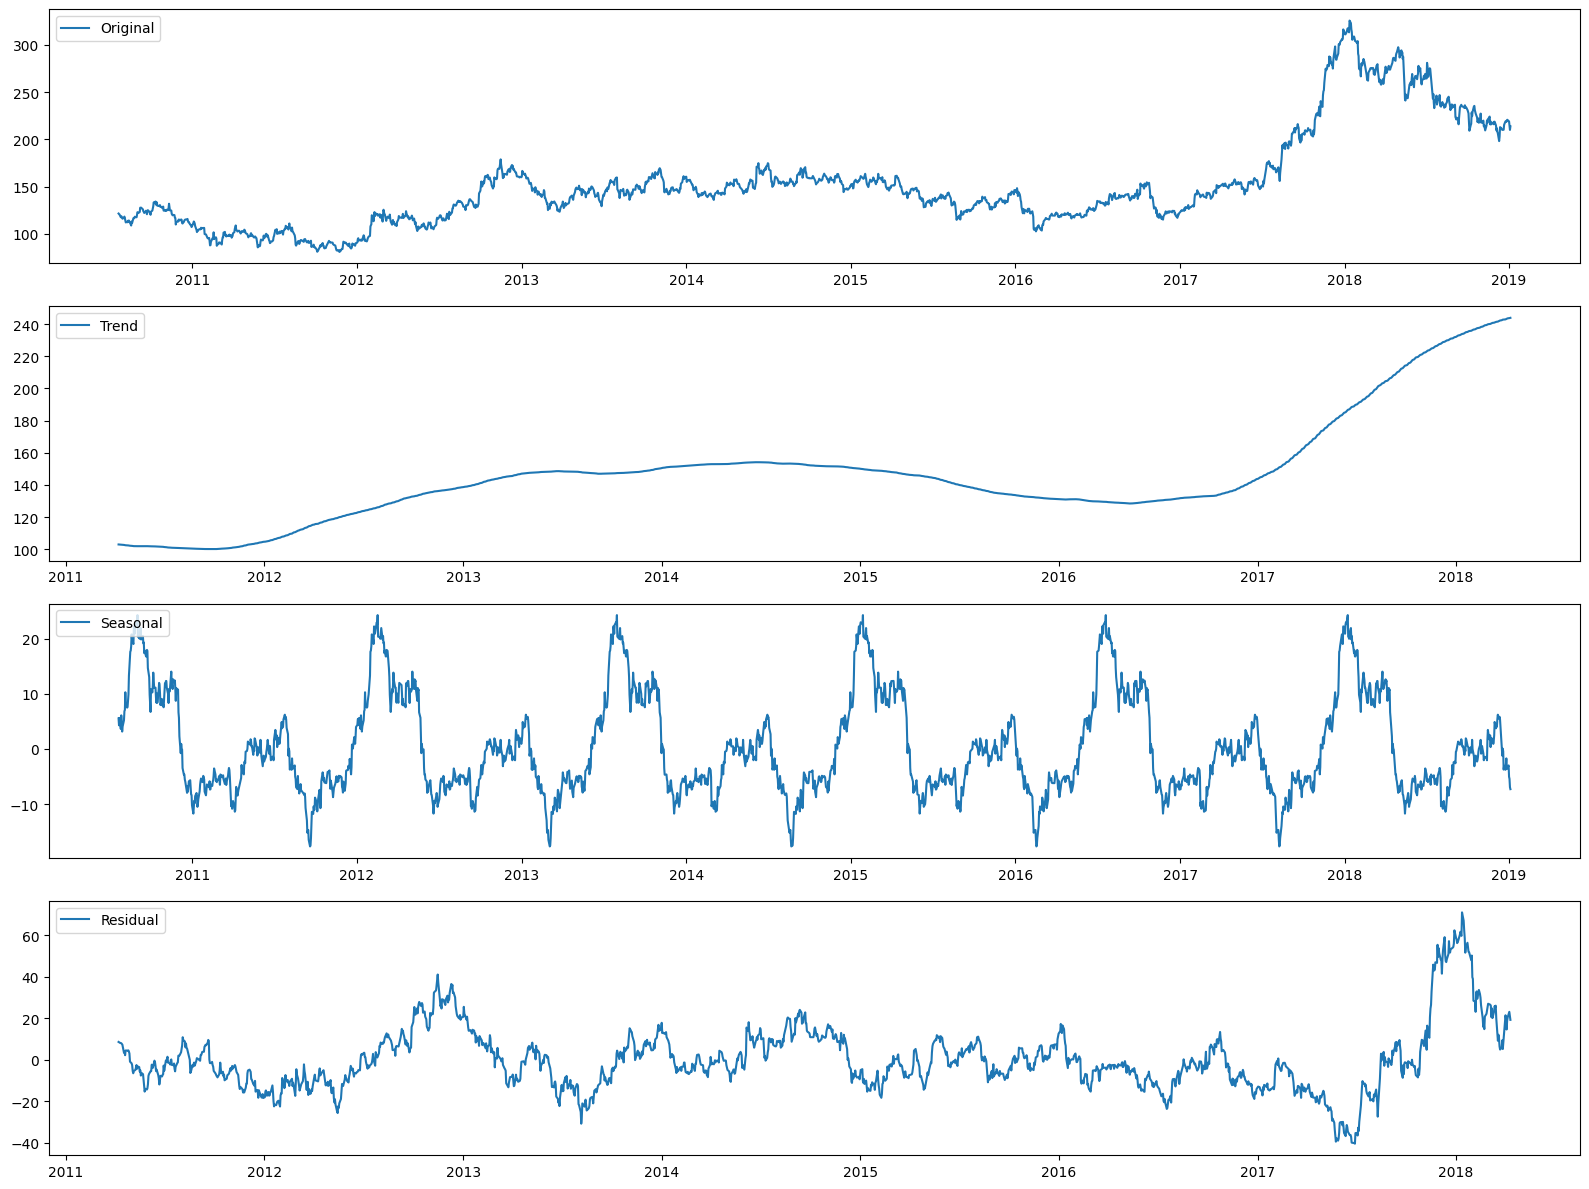

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data['Close'], model='additive', period=365)

# Plot the decomposition
plt.figure(figsize=(16, 12))
plt.subplot(4, 1, 1)
plt.plot(data['Close'], label='Original')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
